> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# VII: Neural Networks

<div style="text-align: right"> **Due date: Dec. 21, 2018.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 9 PM in the form of [ID_Name_HW7.ipynb].** </div> 
<div style="text-align: right"> Beomjun Kim(김범준): <a href="mailto:beomjun.kim@yonsei.ac.kr">beomjun.kim@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Chanho Um(엄찬호): <a href="mailto:chanho0103@yonsei.ac.kr">chanho0103@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

<h2><span style="color:blue">[2016142072] [NamGilHyun]</span> </h2>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2018-12-21 11:54:30.028207


## Problem description

We will implement a simple neural network for binary classification. Let me first see a behavior of a simple logistic regression method on a $\text{moon}$ dataset. This dataset has been widely used to test nonlinear classifier and clustering methods. We can synthetically generate the dataset with labels from the $\texttt{sklearn.linear_model}$. See the example shown below. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
# dataset
np.random.seed(0)
X, y = sklearn.datasets.make_moons(300, noise = 0.25)

Let's viaualize the $\texttt{moon}$ dataset with the $\texttt{scatter}$ function from $\texttt{matplotlib.pyplot}$.

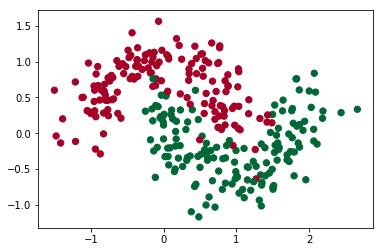

In [4]:
plt.scatter(X[:,0], X[:,1], s = 40, c=y, cmap=plt.cm.RdYlGn)

It seems hard to to classify this dataset with linear classifiers such as a logistic regression method. That is, it is hard to draw a straight line (i.e., decision boundaries) to divide training sets into two different regions pefectly. The $\texttt{sklearn.linear_model}$ provides a set of linear models. See the reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html. 

In [5]:
import sklearn.linear_model

Let's apply logistic regression to the $\texttt{moon}$ dataset and draw decision boundaries. You can use a help function ($\texttt{plot_decision_boundary}$) provided that takes three values (or functions) as inputs. $\texttt{pred_func}$ is an output of the classifiers. In logistic regression, it is the output value of sigmoid functions. Other two arguments, $\texttt{train_data}$ and $\texttt{color}$, are training datasets and color for each label in the dataset, respectively. See the example below.

In [6]:
# logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)

C:\Users\ngh70\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [7]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func, train_data, color):
    # Set min and max values and give it some padding
    x_min, x_max = train_data[:, 0].min() - .5, train_data[:, 0].max() + .5
    y_min, y_max = train_data[:, 1].min() - .5, train_data[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=color, cmap=plt.cm.RdYlGn)

Text(0.5, 1.0, 'Logistic Regression')

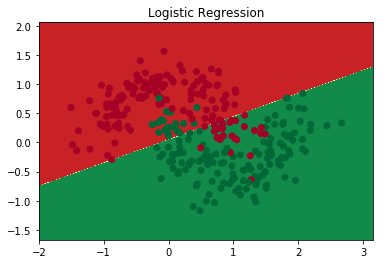

In [8]:
# plot boundary
plot_decision_boundary(pred_func = clf.predict, train_data = X, color = y)
plt.title("Logistic Regression")

As you can see, we need nonlinear classifiers to classify such datasets. Let's implement a simple neural network and check that it gives a nonlinear classifier. The network we will implement consists series of fully connected layers followed by nonlinear activation functions. 

### I. Neural networks using gradiend descent.
(*90 points*) P1.1 Implement a multilayer perceptron method using gradient descent. A detailed description of the nework is shown below. Plot a decision boundary on the $\texttt{moon}$ dataset.

 > $H_1 = ReLU(X \cdot W_1 + b_1)$ where $ReLU$ is a rectified linear unit and $H_1$ is an output of the first hidden layer. 
 
 > $H_2 = \sigma(H_1 \cdot W_2 + b_2)$ where $\sigma$ is a sigmoid function and $H_2$ is an output of the second hidden layer.    
 
 > $\hat y = softmax(H_2 \cdot W_3 + b_3)$ where $softmax$ is a softmax function and $\hat y$ is an output of the network.
 > The $j$th element of the softmax function is defined as follows.
 >
 > $softmax(z)_j= \frac{\exp^{z_j}}{\sum_{k=1}^{K} \exp^{z_k}}$ for $j=1,\dots,K$,
 >
 > where $z_j$ is the $j$th element of the input vector $z\in \mathcal{R}^K$ and $K$ is the number of class.
 
Note that $softmax$ can be can be seen as a general version of the sigmoid function, and it is typically used for multiclass classification. 
 
 > $W$ and $b$ are weights and bias, respectively.   
 
 > Initialization for weight: Standard normal (use $\texttt{np.random.randn}$.)
 
 > Initialization for bias: 0   
 
 > Input size: 2
 
 > The first hidden layer size: 10
 
 > The second hidden layer size: 10
 
 > Output size: 2
 
 > Loss function: Cross entropy loss (or equivently log loss). For each training sample, we define a log loss function as follows:
 >
 > $L = -\sum_{k=1}^K I_k \log(softmax(z)_k)$
 >
 > where $I_k$ ia an indicator function that has the value of 1 iff the training sample belongs to the class $k$ and 0 otherwise.
 
 > Optimization: Gradient descent
 
 > Learning rate = 0.001
 
 > Number of epochs = 50000

(*5 points*) P1.2 Plot training losses over the number of epochs. 

### II. Play with your networks
(*5 points*) P2.1 Change size of hidden layers as follows, and plot decision boundaries. 
(1,1), (2,2), (3,3), (4,4), (5,5), (20,20), (50,50) where the first and second elements are size of first and second hidden layers, respectively. 

**P1.1**

In [9]:
input_dim = 2 # given input layer dimension
output_dim = 2 # given output layer dimension
train_size = len(X) # training data size
etha = 0.001 # given learning rate

# Define activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)

# define derivative of relu function
def reluDerivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

문제에 주어진 input size와 output size 를 정해주었고 학습시 사용될 경사하강법의 learning rate인 etha를 문제에 주어진 대로 0.001로 설정해주었다. 또한 각각 히든 레이어1과 2의 활성화 함수인 relu 함수와 sigmoid함수를 정의해주었다.
마지막으로 backpropagation 과정에서 사용될 relu함수의 도함수인 reluDerivative함수도 정의해 주었다.

In [10]:
def cal_loss(param):
    # Bring parameters(weights and biases)
    W1, b1, W2, b2, W3, b3 = param['W1'], param['b1'], param['W2'], param['b2'], param['W3'], param['b3']
    
    # Forward propagation 
    z1 = X.dot(W1) + b1
    a1 = relu(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)
    z3 = a2.dot(W3) + b3
    
    # Applying softmax
    exp = np.exp(z3)
    p = exp / np.sum(exp, axis=1, keepdims=True)
    
    # Calculating cross entropy loss
    ilogp = -np.log(p[range(train_size), y])
    loss = np.sum(ilogp)
  
    return loss

문제에서 주어진 cross entropy loss(log loss)를 계산하는 함수를 구현하였다. 이 함수는 학습된 이후의 파라미터(W,b)값들을 가져와서 이 파라미터로 forward propagation으로 예측치를 구하고 예측치(y_hat)와 참값(y)을 통해 cross entropy loss를 반환하는 함수이다. 
forward propagation을 간단히 설명하자면 그 전레이어의 노드의 값들과 파라미터의 내적값 + bias(z1)에 activation function이 취해진 값(a1)이 다음 레이어의 노드의 input이 된다.


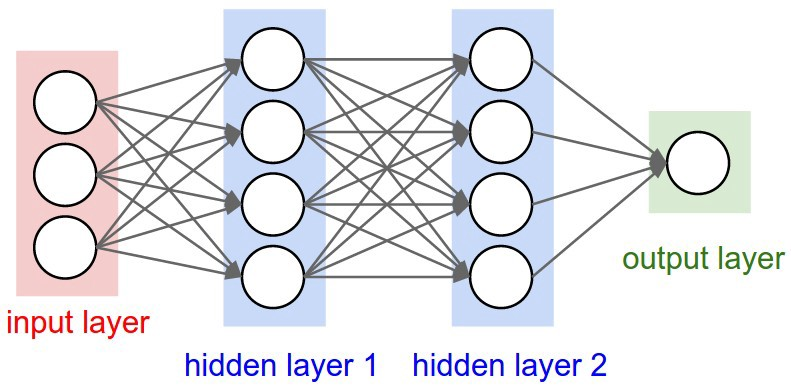

이미지 출처: https://www.google.co.kr/url?sa=i&source=images&cd=&ved=2ahUKEwiCkbP-2I_fAhVD_GEKHRfzCBAQjhx6BAgBEAM&url=https%3A%2F%2Ftowardsdatascience.com%2Fcoding-neural-network-forward-propagation-and-backpropagtion-ccf8cf369f76&psig=AOvVaw30nKciZ9GgGgNq5kjRj9tp&ust=1544340006615293

위의 그림이 우리 문제 상황처럼 hidden layer가 2개인 신경망을 나타낸 것이라고 볼수 있는데, 각 layer의 맨 위의 node를 bias라고 보면, layer사이의 화살표들이 파라미터값들이라고 볼 수 있다. 그렇기 때문에 loss를 계산하는 cal_loss함수에서 받는 파라미터의 종류가 W1,W2,W3,b1,b2,b3 인 것이다. 보통 분류 문제에서는 ouput node에 softmax 함수를 적용하는데, 구체적으로 살펴보면 p라는 array에는 300개의 data point마다의 softmax를 통과하여 갖게된 예측 확률을 값으로 가진다. 이후 logp에는 해당 클래스에 해당되는 확률값에 로그를 취한 후 부호가 바뀐 값(\\({ I }_{ k }softmax{ (z) }_{ k }\\)이 저장되고 이를 모든 데이터 포인트마다 다 더하면 총 loss(\\({ \sum { I } _{ k }softmax{ (z) }_{ k } }\\)를 구할 수 있다.

In [11]:
def cal_predict(param, x):
    # bring learned parameters
    W1, b1, W2, b2, W3, b3 = param['W1'], param['b1'], param['W2'], param['b2'], param['W3'], param['b3']
    
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = relu(z1) # after activation func
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2) # after activation func
    z3 = a2.dot(W3) + b3
    
    # Applying softmax
    exp = np.exp(z3)
    p = exp / np.sum(exp, axis=1, keepdims=True)
    
    return np.argmax(p, axis=1)

predict 함수는 학습된 이후의 파라미터값들과 input data x를 인자로 받아서 x에대한 예측치를 반환하는 함수이다. forward propagation과 softmax 과정을 통해 p라는 행렬에 x의 데이터 포인트마다 각 output일 확률이 성분으로 저장된다. 이후 각 행마다 더 큰 확률값을 가지는 output 값(0,1 - 열 번호) 이 저장된 어레이가 반환된다. (np.argmax이용 - 더 큰 값을 가지는 argument반환)
이 문제에서 x는 크기가 300 이므로 0또는 1의 값을 가지는 300개의 예측치가 반환된다.

In [12]:
# h1dim: number of nodes in first hidden layer
# h2dim: number of nodes in second hidden layer

def train(h1dim, h2dim, epoch):
    
    # Initialization for weight = standard normal, Initialization for bias = 0
    np.random.seed(0)
    W1 = np.random.randn(input_dim,h1dim) 
    b1 = np.zeros((1, h1dim))
    W2 = np.random.randn(h1dim, h2dim) 
    b2 = np.zeros((1, h2dim))
    W3 = np.random.randn(h2dim, output_dim)
    b3 = np.zeros((1, output_dim))

    
    param = {} # Set of parameters
    loss_set = []
    
    for i in range(0, epoch):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = relu(z1) # after activation func
        z2 = a1.dot(W2) + b2
        a2 = sigmoid(z2) # after activation func
        z3 = a2.dot(W3) + b3
        
        # Applying softmax
        exp = np.exp(z3)
        p = exp / np.sum(exp, axis=1, keepdims=True)

        # Backpropagation
        delta4 = p
        delta4[range(train_size), y] -= 1
        dW3 = (a2.T).dot(delta4)
        db3 = np.sum(delta4, axis=0, keepdims=True)
        delta3 = delta4.dot(W3.T) * ((1 - a2)*a2) # derivative of sigmoid function
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (reluDerivative(a1))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)


        # Updating parameter through gradient descent
        W1 += -etha * dW1
        b1 += -etha * db1
        W2 += -etha * dW2
        b2 += -etha * db2
        W3 += -etha * dW3
        b3 += -etha * db3
        
        # Saving new parameters
        param = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2,'W3': W3, 'b3': b3 }
        
        # Saving training loss by epoch
        loss_set.append(cal_loss(param))
         
    return param, loss_set # Return learned parameters and loss_set

train 함수는 인자로 첫번째 히든 레이어의 크기와 두번째 히든레이어의 크기, 그리고 gradient descent과정을 얼마나 반복할지 결정하는 epoch 수를 받아서 학습이 끝난 이후의 파라미터 값들과 epoch마다의 training loss 가 저장된 loss_set을 반환한다. 학습은 gradient descent를 통해 손실을 최소화하는 parameter를 찾는 과정으로 이루어지는데, loss function을 L이라 할때 특정 weight이 업데이트되는 과정은 다음과 같다. 

\\({ W }_{ k,new }={ W }_{ k }-\eta \frac { \partial L }{ \partial { W }_{ k } } \\)

여기서 etha는 learning rate를 의미한다. 이 식대로 weight을 업데이트 하려면 loss func을 weight으로 미분한 값을 구해야 하는데, 바로 이 값을 구하기 위해서 backpropagation을 한다. backpopageation을 간단히 말로 설명하자면, 현재 입력값에 대한 Loss의 변화량은 Loss로부터 흘러들어온 그래디언트(upstream gradient)에 로컬 그래디언트를 곱해서 구한다는 것이고(chain rule 이용), 이 그래디언트는 그 앞에 있는 노드로 역전파된다.

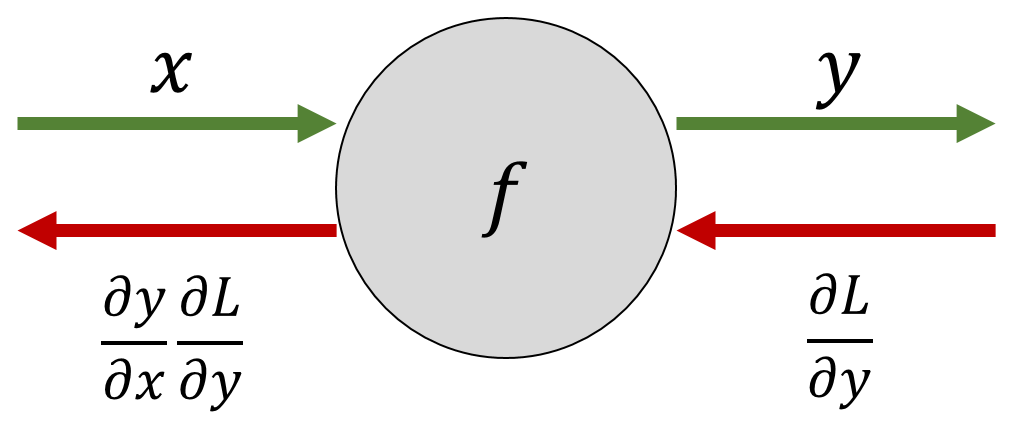
이미지 출처: https://ratsgo.github.io/deep%20learning/2017/05/14/backprop/

\\(\frac { \partial L }{ \partial x } =\frac { \partial y }{ \partial x } *\frac { \partial L }{ \partial y } \\)

위의 그림에서 \\(\frac { \partial L }{ \partial y } \\)가 upstream gradient 이고 \\(\frac { \partial y }{ \partial x } \\)가 local gradient 이다. 이러한 과정을 우리 모델에 적용하면 다음과 같다. 

\\({ \Delta  }_{ 4 }=\hat { y } -y\quad\quad\quad\quad{ \Delta  }_{ 3 }={ \sigma  }^{ ' }({ z }_{ 2 }){ \Delta  }_{ 4 }{ W }_{ 3 }^{ T }\quad\quad\quad\quad{ \Delta  }_{ 2 }={ Relu }^{ ' }({ z }_{ 1 }){ \Delta  }_{ 3 }{ W }_{ 2 }^{ T }\\)


\\(d{ W }_{ 3 }=\frac { \partial L }{ \partial { W }_{ 3 } } ={ a }_{ 2 }^{ T }{ \Delta  }_{ 4 }\quad\quad\quad\quad d{ W }_{ 2 }=\frac { \partial L }{ \partial { W }_{ 2 } } ={ a }_{ 1 }^{ T }{ \Delta  }_{ 3 }\quad\quad\quad\quad d{ W }_{ 1 }=\frac { \partial L }{ \partial { W }_{ 1 } } ={ X }_{ 1 }^{ T }{ \Delta  }_{ 2}\\)

\\(d{ b }_{ 3 }=\frac { \partial L }{ \partial { b }_{ 3 } } ={ \Delta  }_{ 4 }\quad\quad\quad\quad d{ b }_{ 2 }=\frac { \partial L }{ \partial { b }_{ 2 } } ={ \Delta  }_{ 3 }\quad\quad\quad\quad d{ b }_{ 1 }=\frac { \partial L }{ \partial { b }_{ 1 } } ={ \Delta  }_{ 2 }\\)


여기서 \\(\hat { y }\\)은 앞에서 살펴봤던 softmax를 통과한 확률값이고, \\(\sigma (x)\\) 는 sigmoid함수를 나타낸다. 이를 python code로 구현하였다. 문제에 주어진 대로 초기 weight 값은 표준정규분포를 따르는 랜덤 값으로 initialize하고 bias는 0으로 초기화한 후, 위와같은 과정을 통해 W1, W2, W3, b1, b2, b3을 update할 수 있다. 한epoch 마다 forward propagation, backpropagation, update parameters 를 반복하면서 점점 Loss를 최소로하는 parameter 값에 가깝게 된다. 주어진 epoch가 다 끝나면 그때의 parameter값들과 epoch마다의loss가 저장된 loss set을 반환한다.


**P1.2**

In [13]:
param,loss_set = train(10,10,50000)

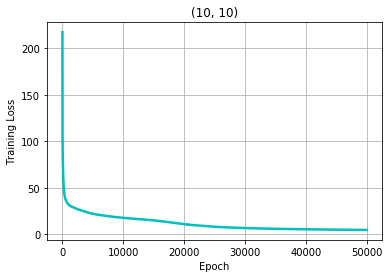

In [14]:
x1 = range(0,len(loss_set))
y1 = [loss_set[v] for v in x1]

# Plot the graph
plt.plot(x1,y1,'c-',lw=2.5)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title((10,10))
plt.grid(True)
plt.show()

문제에 주어진 대로 첫번째 히든 레이어의 크기가 10, 두번째 히든 레이어의 크기가 10일때, epoch 50000에 대한 training loss를 plot하였다. 
처음 loss는 200이상이었으나 급격하게 감소하고 epoch가 50000에 가까워지면 loss도 거의 0에 수렴함을 확인 할 수 있었다. 다만 가끔 loss값이 살짝 튀는 것을 볼 수 있는데 이는 그래프에서는 선굵기가 일정하여 한두개만 튀어도 많이 튀는 것처럼 보이기 때문이다.

Text(0.5, 1.0, 'Decision Boundary for layer size (10,10)')

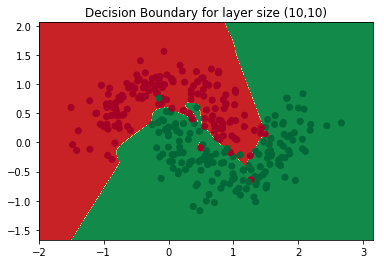

In [15]:
plot_decision_boundary( lambda x: cal_predict(param, x), train_data = X, color = y)
plt.title("Decision Boundary for layer size (10,10)")

**P2**

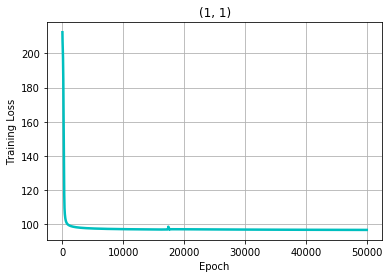

In [16]:
param,loss_set = train(1,1,50000)
x1 = range(0,len(loss_set))
y1 = [loss_set[v] for v in x1]

# Plot the graph
plt.plot(x1,y1,'c-',lw=2.5)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title((1,1))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Decision Boundary for layer size (1,1)')

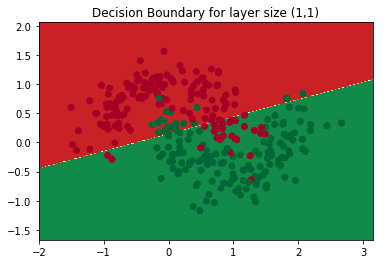

In [17]:
plot_decision_boundary( lambda x: cal_predict(param, x), train_data = X, color = y)
plt.title("Decision Boundary for layer size (1,1)")

표를 살펴보면 loss가 급격하게 감소하는 양상은 같으나 hidden layer의 size가 10,10 일때와 달리 epoch50000번을 완료했을때도 loss가 0에 수렴하지 않고 100근처의 값을 가지는 것을 알 수 있다. 또한 decision boundary를 살펴보았을 때도 데이터의 구분을 충분히 하지 못하는 것을 확인할 수 있다.

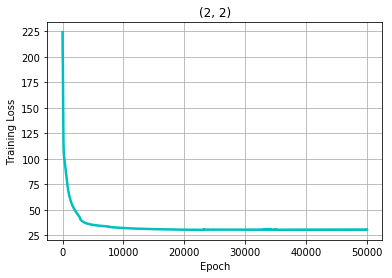

In [18]:
param,loss_set = train(2,2,50000)
x1 = range(0,len(loss_set))
y1 = [loss_set[v] for v in x1]

# Plot the graph
plt.plot(x1,y1,'c-',lw=2.5)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title((2,2))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Decision Boundary for layer size (2,2)')

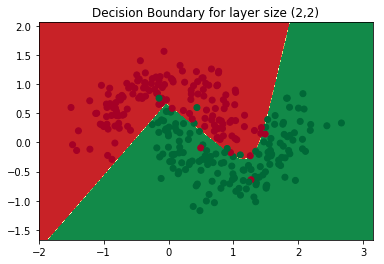

In [19]:
plot_decision_boundary( lambda x: cal_predict(param, x), train_data = X, color = y)
plt.title("Decision Boundary for layer size (2,2)")

hidden layer의 size가 (1,1)일때와 달리 최종 loss가 약 35 정도로 많이 감소한 것을 확인할 수 있었다. 이에 따른 decision boundary도 이전보다 훨씬 데이터를 잘 나누는 것을 확인할 수 있다. 

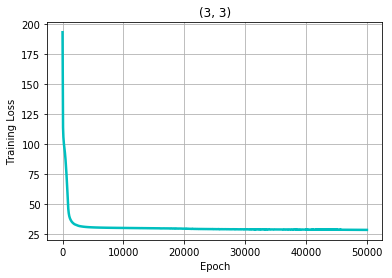

In [20]:
param,loss_set =train(3,3,50000)
x1 = range(0,len(loss_set))
y1 = [loss_set[v] for v in x1]

# Plot the graph
plt.plot(x1,y1,'c-',lw=2.5)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title((3,3))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Decision Boundary for layer size (3,3)')

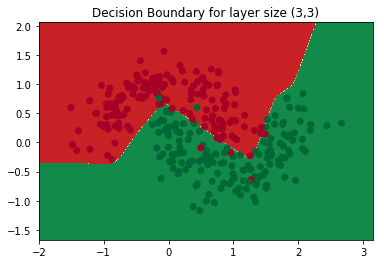

In [21]:
plot_decision_boundary( lambda x: cal_predict(param, x), train_data = X, color = y)
plt.title("Decision Boundary for layer size (3,3)")

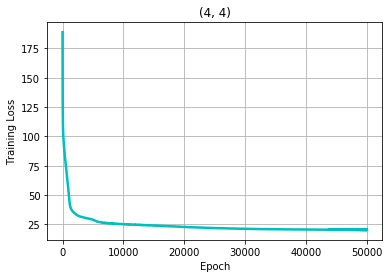

In [22]:
param,loss_set = train(4,4,50000)
x1 = range(0,len(loss_set))
y1 = [loss_set[v] for v in x1]

# Plot the graph
plt.plot(x1,y1,'c-',lw=2.5)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title((4,4))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Decision Boundary for layer size (4,4)')

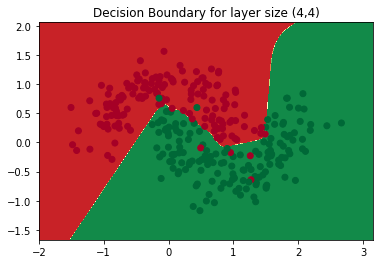

In [23]:
plot_decision_boundary( lambda x: cal_predict(param, x), train_data = X, color = y)
plt.title("Decision Boundary for layer size (4,4)")

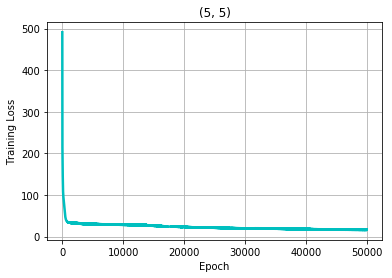

In [24]:
param,loss_set = train(5,5,50000)
x1 = range(0,len(loss_set))
y1 = [loss_set[v] for v in x1]

# Plot the graph
plt.plot(x1,y1,'c-',lw=2.5)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title((5,5))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Decision Boundary for layer size (5,5)')

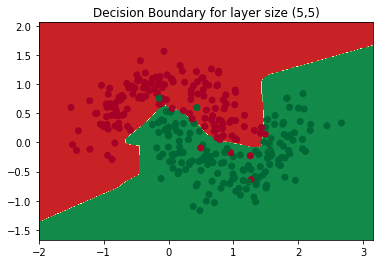

In [25]:
plot_decision_boundary( lambda x: cal_predict(param, x), train_data = X, color = y)
plt.title("Decision Boundary for layer size (5,5)")

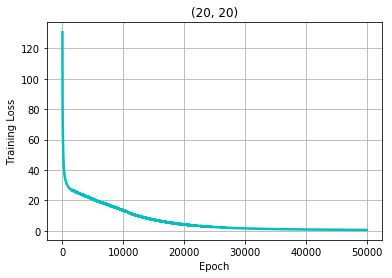

In [26]:
param,loss_set = train(20,20,50000)
x1 = range(0,len(loss_set))
y1 = [loss_set[v] for v in x1]

# Plot the graph
plt.plot(x1,y1,'c-',lw=2.5)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title((20,20))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Decision Boundary for layer size (20,20)')

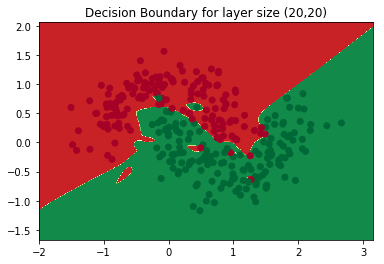

In [27]:
plot_decision_boundary( lambda x: cal_predict(param, x), train_data = X, color = y)
plt.title("Decision Boundary for layer size (20,20)")

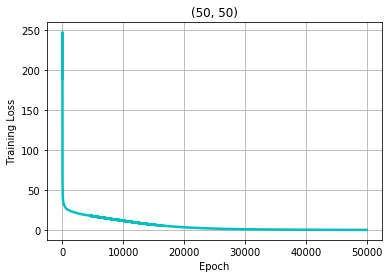

In [28]:
param,loss_set = train(50,50,50000)
x1 = range(0,len(loss_set))
y1 = [loss_set[v] for v in x1]

# Plot the graph
plt.plot(x1,y1,'c-',lw=2.5)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title((50,50))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Decision Boundary for layer size (50,50)')

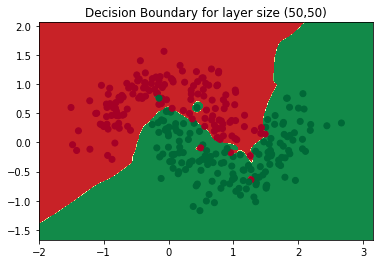

In [29]:
plot_decision_boundary( lambda x: cal_predict(param, x), train_data = X, color = y)
plt.title("Decision Boundary for layer size (50,50)")

hidden layer size가 (1,1)~(50,50)일 때의 training loss와 Decision boundary를 살펴보았는데, size가 커질수록 boundary의 굴곡이 복잡해짐을 확인할 수 있었고, 최종 loss도 감소함을 알 수 있었다. 다만 학습할 때마다 weight값들을 random으로 initialize하다 보니 같은 size라 하더라도 시행마다 조금씩 다른 결과가 나왔으나 기본적으로는 epoch가 증가할때마다 loss감소하는 올바른 방향으로 학습이 진행됨을 알 수 있었다. 맨 앞에 moon dataset을 logistic regression으로 분류한 결과를 살펴보았는데, 데이터가 linearly separable하지 않아서 잘 못 분류했었다. 그러나 hidden layer가 적용된 신경망 모델을 사용했을 땐 훨씬 잘 분류할 수 있음을 알 수 있었다. 